## Group No : 52

## Group Member Names:
1. CHAGANTI S S V S LAKSHMINARAYANA(2023ad05097@wilp.bits-pilani.ac.in)- contribution -100%
2. PRADYOTHANA D P(2023ad05059@wilp.bits-pilani.ac.in) - contribution -100%
3. BRAJESH KUMAR SETHI(2023ac05335@wilp.bits-pilani.ac.in)- contribution -100%
4. BHOGE ANKIT ARUN MADHURI(2023dc04324@wilp.bits-pilani.ac.in)-  contribution -100%


Here's a structured problem formulation for your customer churn prediction project:  

---

## **1. Problem Formulation**  

### **Business Problem**  
Customer churn is a critical issue for subscription-based businesses. Losing customers impacts revenue, growth, and operational efficiency. The goal is to predict which customers are likely to churn so that proactive retention strategies can be implemented.  

### **Key Business Objectives**  
- **Reduce customer churn rate** by identifying at-risk customers early.  
- **Improve customer retention strategies** through targeted interventions.  
- **Optimize marketing and customer support efforts** by understanding churn patterns.  

### **Key Data Sources & Attributes**  
The dataset consists of customer-related attributes that influence churn. The key attributes include:  

- **CustomerID**: Unique identifier for each customer.  
- **Age**: Customer’s age.  
- **Gender**: Male or Female.  
- **Tenure**: How long the customer has been subscribed (in months).  
- **Usage Frequency**: How often the customer uses the service.  
- **Support Calls**: Number of customer support interactions.  
- **Payment Delay**: Delays in payment (in days).  
- **Subscription Type**: Type of subscription (e.g., Basic, Premium).  
- **Contract Length**: Duration of the customer's contract (e.g., Monthly, Annual).  
- **Total Spend**: Total amount spent by the customer.  
- **Last Interaction**: Time since last interaction (in days).  
- **Churn**: Whether the customer has churned (Yes/No).  

### **Expected Outputs from the Pipeline**  
1. **Clean datasets for exploratory data analysis (EDA)**  
   - Handle missing values and outliers.  
   - Convert categorical variables to numerical representations.  

2. **Transformed features for machine learning**  
   - Normalize/scale numerical data.  
   - Engineer new features if necessary (e.g., interaction between variables).  

3. **A deployable model to predict customer churn**  
   - Train a classification model (e.g., Decision Tree, Random Forest, XGBoost, or Neural Networks).  
   - Deploy the model for real-time predictions.  

### **Measurable Evaluation Metrics**  
- **Accuracy**: Overall correctness of the model.  
- **Precision & Recall**: Evaluate the model’s ability to correctly identify churners.  
- **F1-Score**: Balances precision and recall.  
- **ROC-AUC Score**: Measures the ability of the model to distinguish between churners and non-churners.  

### **Deliverables**  
- **A PDF/Markdown document** containing:  
  - Business problem  
  - Objectives  
  - Data sources  
  - Pipeline outputs  
  - Evaluation metrics  
- **A trained machine learning model** to predict customer churn.  
- **Data processing and model training scripts** for reproducibility.  


### Install & Import Dependencies

In [27]:
import os
import requests
import pandas as pd
import logging
import time
from datetime import datetime
import json

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 2. Data Ingestion

In [28]:
# CSV file path
CSV_FILE_PATH = "~/Downloads/DMML_assignment/customer_churn_dataset-testing-master.csv"

# API URL
API_URL = "https://657165bcd61ba6fcc0126420.mockapi.io/customers"


Fetch Data from CSV

In [30]:
def fetch_csv_data():
    try:
        df = pd.read_csv(CSV_FILE_PATH)
        log_message(logging.INFO, "Successfully ingested data from CSV file.")
        return df
    except Exception as e:
        log_message(logging.ERROR, f"Failed to fetch CSV data: {e}")
        return None

# Test CSV ingestion
csv_data = fetch_csv_data()
csv_data.head() if csv_data is not None else "CSV Data Fetch Failed"


2025-03-14 09:56:34.345947 - 20 - Successfully ingested data from CSV file.


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


Fetch Data from API

In [31]:
def fetch_api_data():
    try:
        response = requests.get(API_URL, timeout=10)
        response.raise_for_status()
        data = response.json()
        df = pd.DataFrame(data)
        log_message(logging.INFO, "Successfully ingested data from API.")
        return df
    except requests.exceptions.RequestException as e:
        log_message(logging.ERROR, f"Failed to fetch API data: {e}")
        return None

# Test API ingestion
api_data = fetch_api_data()
api_data.head() if api_data is not None else "API Data Fetch Failed"

api_df = pd.DataFrame(api_data)
api_df.to_csv('api_data.csv', index=False)


2025-03-14 09:56:37.295262 - 20 - Successfully ingested data from API.


Setup Logging

In [10]:
# Define log file
log_file = "data_ingestion.log"

# Configure logging
logging.basicConfig(filename=log_file, level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Function to log messages
def log_message(level, message):
    print(f"{datetime.now()} - {level} - {message}")
    logging.log(level, message)


## 3. Raw Data Storage

Combine and Store Data

In [11]:
def ingest_data():
    csv_data = fetch_csv_data()
    # api_df = fetch_api_data() # Fetch data from API and store as api_df

    if csv_data is not None and api_df is not None:
        combined_data = pd.concat([csv_data, api_df], ignore_index=True) # Use api_df
        combined_data.to_csv("raw_ingested_data.csv", index=False)
        log_message(logging.INFO, "Successfully combined and stored ingested data.")
    else:
        log_message(logging.WARNING, "Skipping data storage due to missing sources.")

# Run the ingestion process
ingest_data()

2025-03-14 08:48:12.070540 - 20 - Successfully ingested data from CSV file.
2025-03-14 08:48:12.317278 - 20 - Successfully combined and stored ingested data.


Automate Periodic Ingestion (Every Hour)

In [12]:
# # Get the number of rows in CSV
# csv_data = fetch_csv_data()
# num_rows = len(csv_data) if csv_data is not None else 1  # Default to 1 if CSV is empty or missing

# # Run ingestion as many times as the number of rows
# for i in range(num_rows):
#     log_message(logging.INFO, f"Running ingestion {i+1}/{num_rows} times based on dataset size.")
#     ingest_data()
#     time.sleep(3600)  # Wait for 1 hour

# 4. Data Validation

In [16]:
def validate_data(df):
    """
    Performs data validation checks on a Pandas DataFrame.

    Args:
        df: The input DataFrame.

    Returns:
        A dictionary containing data quality report.
    """
    report = {}

    # Check for missing data
    missing_data = df.isnull().sum()
    report["missing_data"] = missing_data[missing_data > 0].to_dict()

    # Check for inconsistent data (example: checking for invalid gender values)
    inconsistent_gender = df[~df["Gender"].isin(["Male", "Female"])]
    report["inconsistent_gender"] = inconsistent_gender.to_dict()

    # Validate data types (example: check if 'Age' is numeric)
    if not pd.api.types.is_numeric_dtype(df['Age']):
        report["invalid_age_type"] = "Age column is not numeric"

    # Validate data ranges (example: check for unrealistic age values)
    invalid_age_range = df[(df["Age"] < 0) | (df["Age"] > 120)]
    report["invalid_age_range"] = invalid_age_range.to_dict()

    # Identify duplicates
    duplicates = df[df.duplicated()]
    report["duplicates"] = duplicates.to_dict()

    # Identify anomalies (example: unusually high support calls)
    anomalies = df[df["Support Calls"] > 10]  # Example threshold
    report["anomalies"] = anomalies.to_dict()


    return report

df = pd.read_csv("~/Downloads/DMML_assignment/raw_ingested_data.csv")
data_quality_report = validate_data(df)

# Print or save the report
print(data_quality_report)

# Save to a CSV file
report_df = pd.DataFrame.from_dict(data_quality_report, orient="index")
report_df.to_csv("data_quality_report.csv")


{'missing_data': {}, 'inconsistent_gender': {'CustomerID': {}, 'Age': {}, 'Gender': {}, 'Tenure': {}, 'Usage Frequency': {}, 'Support Calls': {}, 'Payment Delay': {}, 'Subscription Type': {}, 'Contract Length': {}, 'Total Spend': {}, 'Last Interaction': {}, 'Churn': {}}, 'invalid_age_range': {'CustomerID': {}, 'Age': {}, 'Gender': {}, 'Tenure': {}, 'Usage Frequency': {}, 'Support Calls': {}, 'Payment Delay': {}, 'Subscription Type': {}, 'Contract Length': {}, 'Total Spend': {}, 'Last Interaction': {}, 'Churn': {}}, 'duplicates': {'CustomerID': {9: 9, 15: 14}, 'Age': {9: 36, 15: 42}, 'Gender': {9: 'Male', 15: 'Male'}, 'Tenure': {9: 20, 15: 46}, 'Usage Frequency': {9: 5, 15: 27}, 'Support Calls': {9: 10, 15: 5}, 'Payment Delay': {9: '8', 15: '8'}, 'Subscription Type': {9: 'Basic', 15: 'Premium'}, 'Contract Length': {9: 'Monthly', 15: 'Quarterly'}, 'Total Spend': {9: 687.0, 15: 438.0}, 'Last Interaction': {9: 8, 15: 30}, 'Churn': {9: 0, 15: 0}}, 'anomalies': {'CustomerID': {}, 'Age': {}, 

# 5. Data Preparation


CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


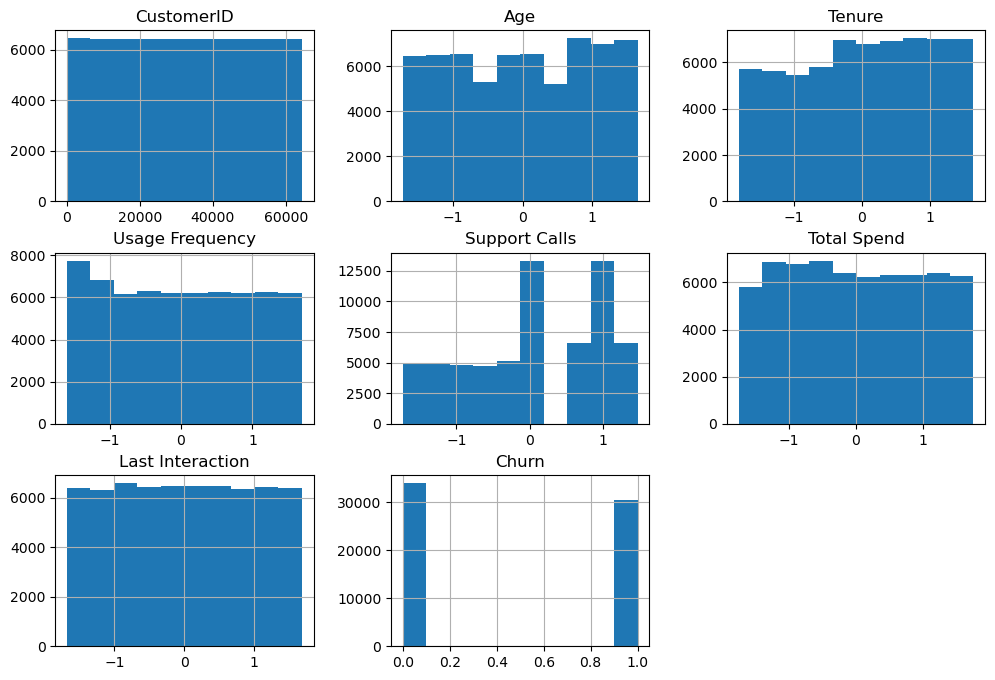

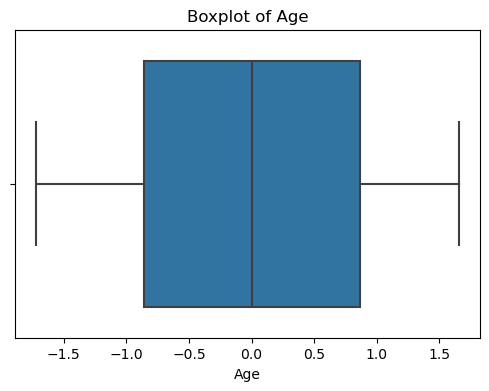

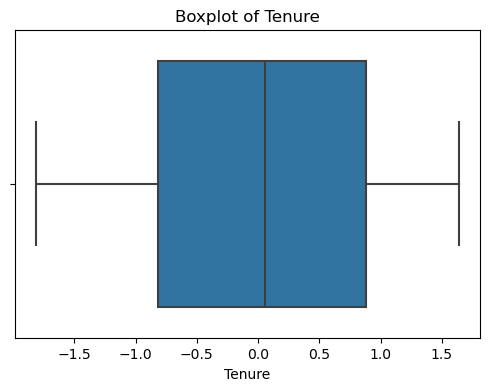

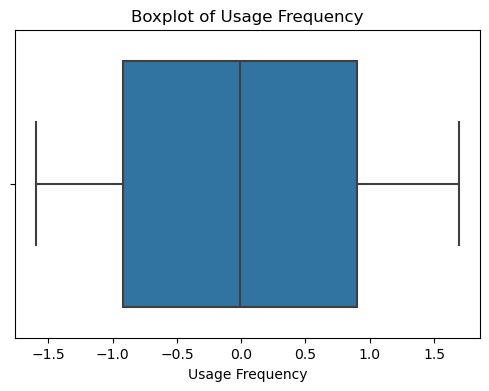

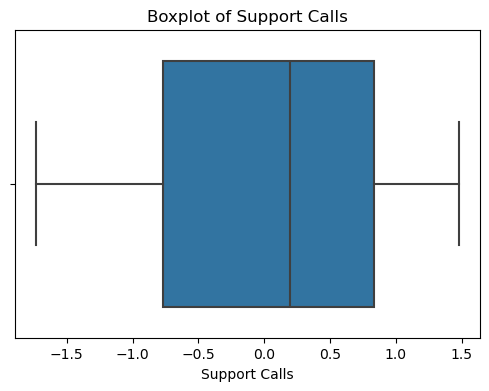

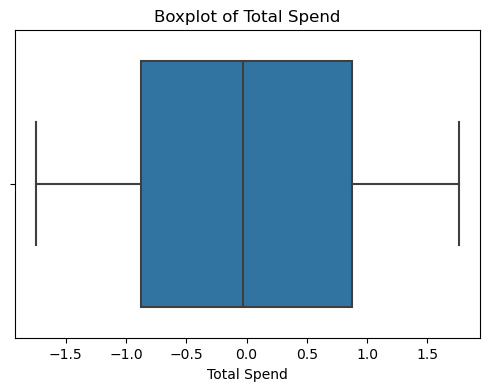

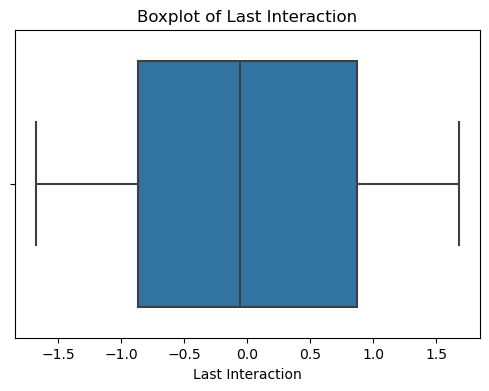

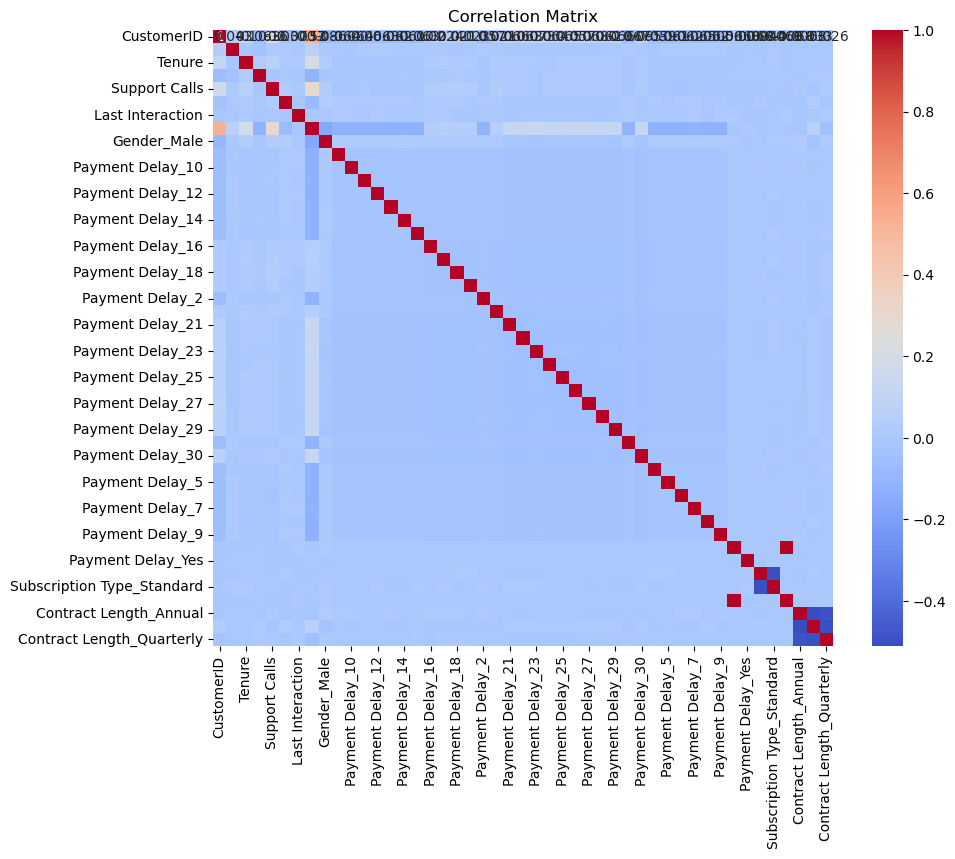

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined dataset
df = pd.read_csv('raw_ingested_data.csv')

# Handling Missing Values
# Check for missing values
print(df.isnull().sum())

# Imputation (Example: fill missing 'Age' with the mean)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Removal (Example: remove rows with missing 'Total Spend')
df.dropna(subset=['Total Spend'], inplace=True)

# Standardize/Normalize Numerical Attributes
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Total Spend', 'Last Interaction']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Encode Categorical Variables
# One-hot encoding
df = pd.get_dummies(df, columns=['Gender', 'Payment Delay', 'Subscription Type', 'Contract Length'], drop_first=True)

# Label encoding (example for 'Churn' - if it's not already numerical)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])


# Exploratory Data Analysis (EDA)
# Histograms
df.hist(figsize=(12, 8))
plt.show()

# Box plots
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, data=df)
    plt.title(f"Boxplot of {col}")
    plt.show()

# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Outlier Detection (Example: using IQR for 'Total Spend')
Q1 = df['Total Spend'].quantile(0.25)
Q3 = df['Total Spend'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Total Spend'] >= lower_bound) & (df['Total Spend'] <= upper_bound)]

# Save the cleaned dataset
df.to_csv("cleaned_data.csv", index=False)


# Data Transformation and Storage

In [33]:

import sqlite3

# Create a connection to the SQLite database (or your chosen database)
conn = sqlite3.connect('customer_data.db')
cursor = conn.cursor()

# SQL Schema Design (Example)
cursor.execute('''
    CREATE TABLE IF NOT EXISTS transformed_customer_data (
        CustomerID INTEGER PRIMARY KEY,
        TotalSpend REAL,
        CustomerTenure INTEGER,
        ActivityFrequency INTEGER,
        ScaledAge REAL,
        -- Add other transformed features here
        Churn INTEGER
    )
''')

# Data Transformation Logic
# Assuming 'df' is your cleaned DataFrame from the previous steps
for index, row in df.iterrows():
    # Create aggregated features
    total_spend = row['Total Spend']

    # Derive new features
    customer_tenure = row['Tenure']
    activity_frequency = row['Usage Frequency']

    # Scale and normalize features
    scaled_age = row['Age']  # Already scaled in the previous step

    # Insert into the table
    cursor.execute('''
        INSERT OR REPLACE INTO transformed_customer_data (CustomerID, TotalSpend, CustomerTenure, ActivityFrequency, ScaledAge, Churn)
        VALUES (?, ?, ?, ?, ?, ?)
    ''', (row['CustomerID'], total_spend, customer_tenure, activity_frequency, scaled_age, row['Churn']))

# Commit changes and close the connection
conn.commit()
conn.close()


# Feature store

In [16]:
#### 1. FEATURE STORE IMPLEMENTATION
# Using Feast (Feature Store for Machine Learning)

!pip install feast

from feast import FeatureStore
import pandas as pd
import numpy as np
import logging
import random
from datetime import datetime, timedelta

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

def log_message(level, message):
    logging.log(level, message)

# Create a larger dataset
num_samples = 100
random.seed(42)

data = {
    "customer_id": list(range(1, num_samples + 1)),
    "total_spend": [random.uniform(100, 1000) for _ in range(num_samples)],
    "tenure": [random.randint(1, 60) for _ in range(num_samples)],
    "churn": [random.choice([0, 1]) for _ in range(num_samples)],
    "last_purchase": [(datetime(2024, 1, 1) + timedelta(days=random.randint(1, 365))).strftime('%Y-%m-%d') for _ in range(num_samples)],
}

feature_df = pd.DataFrame(data)

# Convert integer columns to float to avoid MLflow schema issue
feature_df = feature_df.astype({"total_spend": "float64", "tenure": "float64", "churn": "float64"})

# Save features to CSV (Custom Feature Store Alternative)
feature_df.to_csv("feature_store.csv", index=False)
log_message(logging.INFO, "Feature store updated successfully with 100 samples!")
print("Feature store updated successfully with 100 samples!")  # Added print statement

df = pd.read_csv("feature_store.csv")
print(df.head())

retrieved_features = pd.read_csv("feature_store.csv")
print("Retrieved Feature Data:")
print(retrieved_features.head())

Feature store updated successfully with 100 samples!
   customer_id  total_spend  tenure  churn last_purchase
0            1   675.484119     1.0    0.0    2024-07-22
1            2   122.509680    44.0    0.0    2024-03-09
2            3   347.526387    47.0    0.0    2024-12-10
3            4   300.889664     8.0    1.0    2024-11-27
4            5   762.824093    44.0    0.0    2024-06-03
Retrieved Feature Data:
   customer_id  total_spend  tenure  churn last_purchase
0            1   675.484119     1.0    0.0    2024-07-22
1            2   122.509680    44.0    0.0    2024-03-09
2            3   347.526387    47.0    0.0    2024-12-10
3            4   300.889664     8.0    1.0    2024-11-27
4            5   762.824093    44.0    0.0    2024-06-03


# Data Versioning

In [53]:
#### 2. DATA VERSIONING
# Using DVC (Data Version Control) for tracking datasets
# Install DVC (only needed once)
!pip install dvc

# Change directory using Python (not cd)
import os

# Use raw string or double backslashes
os.chdir(r"C:\Users\laksh\Downloads\DMML_assignment")

# Verify the current working directory
print("Current Directory:", os.getcwd())

# Initialize DVC (force re-init if needed)
!dvc init -f

# Add feature store CSV to DVC tracking
!dvc add feature_store.csv

# Track the DVC file with Git
!git add feature_store.csv.dvc .gitignore .dvc
!git commit -m "Added feature store tracking"

Current Directory: C:\Users\laksh\Downloads\DMML_assignment


Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>

To track the changes with git, run:

	git add feature_store.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


\u280b Checking graph



[master 169c080] Added feature store tracking
 1 file changed, 2 insertions(+), 2 deletions(-)


# Model Building

In [55]:
#### 3. MODEL BUILDING & TRACKING WITH MLflow
# Install necessary libraries

def fetch_csv_data():
    try:
        df = pd.read_csv("feature_store.csv")
        log_message(logging.INFO, "Successfully ingested data from CSV file.")
        return df
    except Exception as e:
        log_message(logging.ERROR, f"Failed to fetch CSV data: {e}")
        return None

#### 3. MODEL BUILDING & TRACKING WITH MLflow
# Install necessary libraries
!pip install mlflow scikit-learn

import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
feature_df = fetch_csv_data()
if feature_df is None:
    raise ValueError("Error loading feature store. Check CSV file.")

X = feature_df[["total_spend", "tenure"]]
y = feature_df["churn"].astype(float)  # Ensure labels are float to prevent MLflow warning

test_size = 0.2
# Disable stratify if dataset is too small
stratify_option = y if len(y.unique()) > 1 and len(y) * test_size >= len(y.unique()) else None

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=stratify_option)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
log_message(logging.INFO, f"Model trained with accuracy: {accuracy}")

# Log model with MLflow
mlflow.set_experiment("churn_prediction")
with mlflow.start_run():
    mlflow.log_param("n_estimators", 100)
    mlflow.log_metric("accuracy", accuracy)
    
    # Provide an example input with proper feature names
    input_example = pd.DataFrame(X_test.iloc[:1], columns=X_train.columns)
    mlflow.sklearn.log_model(model, "churn_model", input_example=input_example)

print(f"Model trained and logged with accuracy: {accuracy}")


Model trained and logged with accuracy: 0.45


# Orchestrating the Data Pipeline

### Install Dependencies

In [7]:
!pip install prefect
!pip install pandas scikit-learn prefect

### Import Required Libraries

In [8]:
from prefect import task, flow
import pandas as pd
import time
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

###  Data Ingestion Task

In [9]:
@task
def ingest_data():
    print("Ingesting data...")
    time.sleep(2)  # Simulate data fetching
    df = pd.DataFrame({
        "customer_id": range(1, 101),
        "tenure": random.choices(range(1, 36), k=100),
        "monthly_charges": random.choices(range(20, 120), k=100),
        "churn": random.choices([0, 1], k=100),
    })
    return df


### Data Validation Task

In [10]:
@task
def validate_data(df):
    print("Validating data...")
    assert not df.isnull().values.any(), "Data contains missing values!"
    return df


### Data Transformation Task

In [11]:
@task
def transform_data(df):
    print("Transforming data...")
    df["tenure_squared"] = df["tenure"] ** 2
    return df


### Feature Engineering Task

In [12]:
@task
def feature_engineering(df):
    print("Performing feature engineering...")
    features = df[["tenure", "tenure_squared", "monthly_charges"]]
    labels = df["churn"]
    return features, labels


### Model Training Task

In [13]:
@task
def train_model(features, labels):
    print("Training model...")
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=50, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.2f}")
    return model


### Define Prefect Flow

In [14]:
@flow(name="Customer Churn Prediction Pipeline")
def churn_pipeline():
    df = ingest_data()
    validated_df = validate_data(df)
    transformed_df = transform_data(validated_df)
    features, labels = feature_engineering(transformed_df)
    model = train_model(features, labels)


### Execute the Pipeline

In [15]:
if __name__ == "__main__":
    churn_pipeline()


16:01:27.547 | INFO    | Flow run 'cyber-porcupine' - Beginning flow run 'cyber-porcupine' for flow 'Customer Churn Prediction Pipeline'

Ingesting data...


16:01:29.849 | INFO    | Task run 'ingest_data-181' - Finished in state Completed()

Validating data...


16:01:30.187 | INFO    | Task run 'validate_data-d89' - Finished in state Completed()

Transforming data...


16:01:30.618 | INFO    | Task run 'transform_data-0b9' - Finished in state Completed()

Performing feature engineering...


16:01:30.977 | INFO    | Task run 'feature_engineering-5ca' - Finished in state Completed()

Training model...
Model Accuracy: 0.55


16:01:31.437 | INFO    | Task run 'train_model-8f0' - Finished in state Completed()

16:01:31.504 | INFO    | Flow run 'cyber-porcupine' - Finished in state Completed()